In [79]:
import pandas as pd
import csv  
import seaborn as sns
import matplotlib.pyplot as plt

Christian Basso

Lab 2

Intro to Data Science

9/14/2023

# **Lab 2: Exploratory Data Analysis**

## **Introduction**

This program will take the cleaned from lab 1 and visually analyze the cleaned data set in hopes of identifying possible predictor variables in a hypothetical modeling scenario to predict price or property type, or both. Each continous and categorical variable will be compared to the dependent variable of price with scatter and box plots, then each variable will be compared to property type with boxplots, cross tabulation tables, and stacked bar graphs. Each variable will then be classified and ranked by their predictive capabilities.

#### Loading the Data

In [80]:
df = pd.read_csv("clean_cali_housing.csv")
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot,street_type
0,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,False,Court
1,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,False,Street
2,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,False,Way
3,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,False,Drive
4,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813,False,Court


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   street       983 non-null    object 
 1   city         983 non-null    object 
 2   zip          983 non-null    int64  
 3   state        983 non-null    object 
 4   beds         983 non-null    int64  
 5   baths        983 non-null    int64  
 6   sq__ft       983 non-null    int64  
 7   type         983 non-null    object 
 8   sale_date    983 non-null    object 
 9   price        983 non-null    int64  
 10  latitude     983 non-null    float64
 11  longitude    983 non-null    float64
 12  empty_lot    983 non-null    bool   
 13  street_type  983 non-null    object 
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 100.9+ KB


In [82]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000
mean,95750.678535,2.915565,1.779247,1316.741607,234280.649034,38.607671,-121.356378
std,85.189034,1.305632,0.894141,852.746015,138387.934562,0.145574,0.137588
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,956.500000,145000.000000,38.482710,-121.446187
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.376220
75%,95828.000000,4.000000,2.000000,1719.000000,300000.000000,38.695633,-121.295795
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


The same variables will be turned into categorical variables as they were in lab 1, with the addition to street_type and empty lot.

In [83]:
df.astype({'city': 'category'})
df.astype({'state': 'category'})
df.astype({'zip': 'category'})
df.astype({'beds': 'category'})
df.astype({'baths': 'category'})
df.astype({'type': 'category'})
df.astype({'street_type' : 'category'})
df.astype({'empty_lot' : 'category'})

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot,street_type
0,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,False,Court
1,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,False,Street
2,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,False,Way
3,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,False,Drive
4,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813,False,Court
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620,False,Court
979,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890,False,Way
980,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803,False,Way
981,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424,False,Way


## **Part 1: Regression on Price**
This section explores which variables are predictive of the price (dependent variable) of a property.

### Possible Continuous Predictiors
Each continuous variable will be plotted in a scatterplot with price being the dependent variable to visualize basic relationships between possible predictors and our target, price.

#### Square Feet vs Price

C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Temp\ipykernel_21248\3845006118.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(axs.get_xticklabels())


Text(0.5, 1.0, 'Square Feet vs Price')

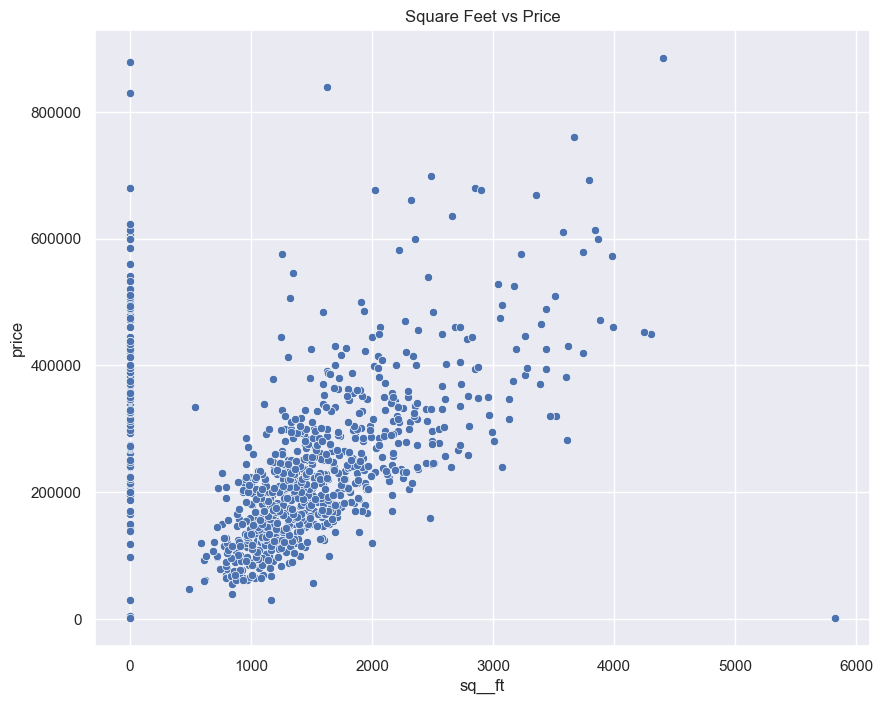

In [84]:
fig, axs = plt.subplots(figsize = (10,8))
sns.scatterplot(x=df["sq__ft"], y=df["price"], ax = axs)
axs.set_xticklabels(axs.get_xticklabels())
plt.title("Square Feet vs Price")

The square feet vs price chart has some important observations,
- There is a wide range of prices properties with 0 sq__ft. As stated in the previous lab, these are empty property lots.
- There is one possible error. The outlier of a ~6,000 sqft property that is just about $0. This may be removed later.
- The naturally linear realtionship between sqft and price widens as both variables increase.

#### Latitude vs Price and Longitude vs Price

C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Temp\ipykernel_21248\2768883956.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(axs.get_xticklabels())


Text(0.5, 1.0, 'Latitude vs Price')

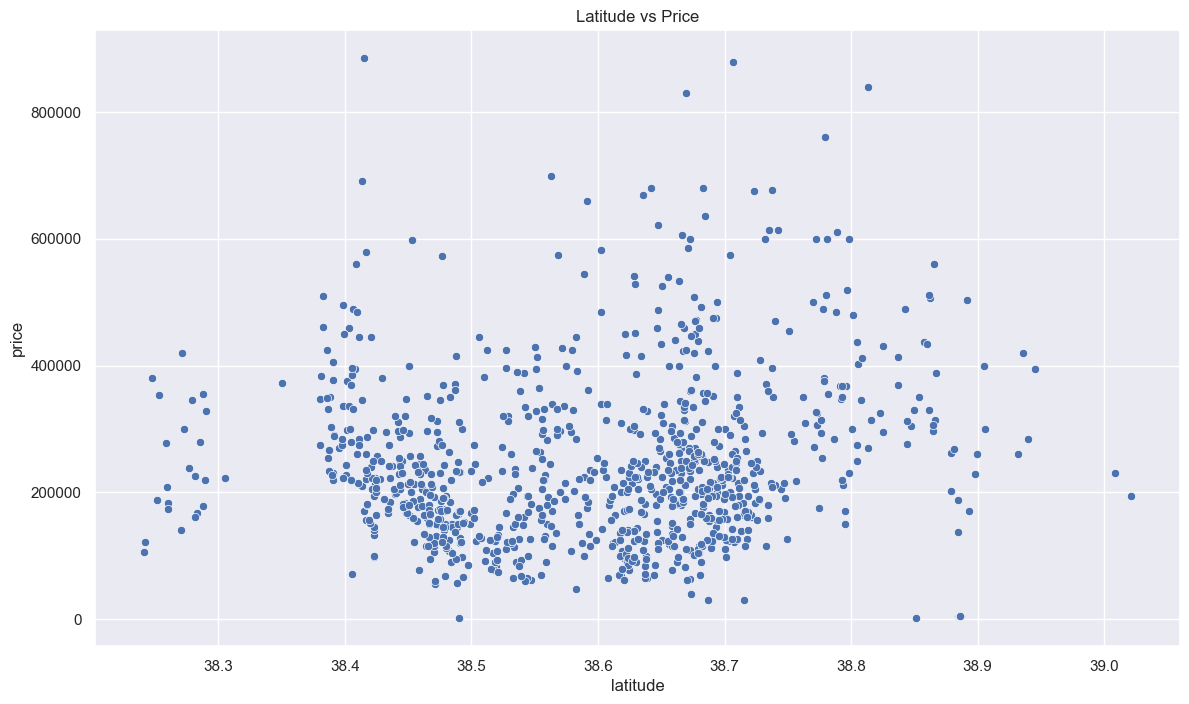

In [85]:
fig, axs = plt.subplots(figsize = (14,8))
sns.scatterplot(x=df["latitude"], y=df["price"], ax = axs)
axs.set_xticklabels(axs.get_xticklabels())
plt.title("Latitude vs Price")

C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Temp\ipykernel_21248\1207892517.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(axs.get_xticklabels())


Text(0.5, 1.0, 'Longitude vs Price')

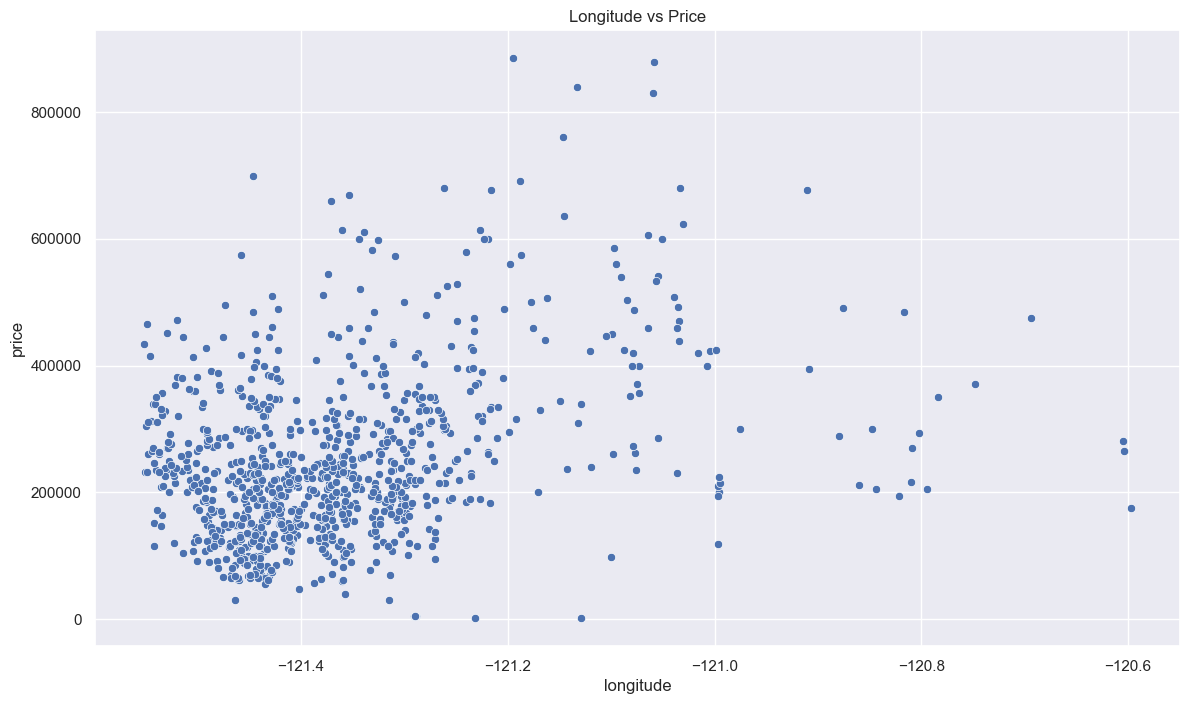

In [86]:
fig, axs = plt.subplots(figsize = (14,8))
sns.scatterplot(x=df["longitude"], y=df["price"], ax = axs)
axs.set_xticklabels(axs.get_xticklabels())
plt.title("Longitude vs Price")

Analzying the latitude and longigude graphs together allow us to again see early relationship clusters between location and price. This location data will give further insite into pricing based on neighborhood, since the only other locational data in this set is the city the property is in.

Each of these graphs give insites to their usefulness as predictors for possible models. Given the natrually linear relation of square feet to price, this relationship will be useful for ML modeling. The latitude and longitude will also be helpful to represent more spesific location data relative to price in an ML model, as properties prices vary quite a bit souly based on the neighborhod they are in. However, square feet may yeild better results compared to location data in a model since the data follows more of a trend. 

### Possible Catigorical Predictors

#### City vs Price

C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

Text(0.5, 1.0, 'City vs Price')

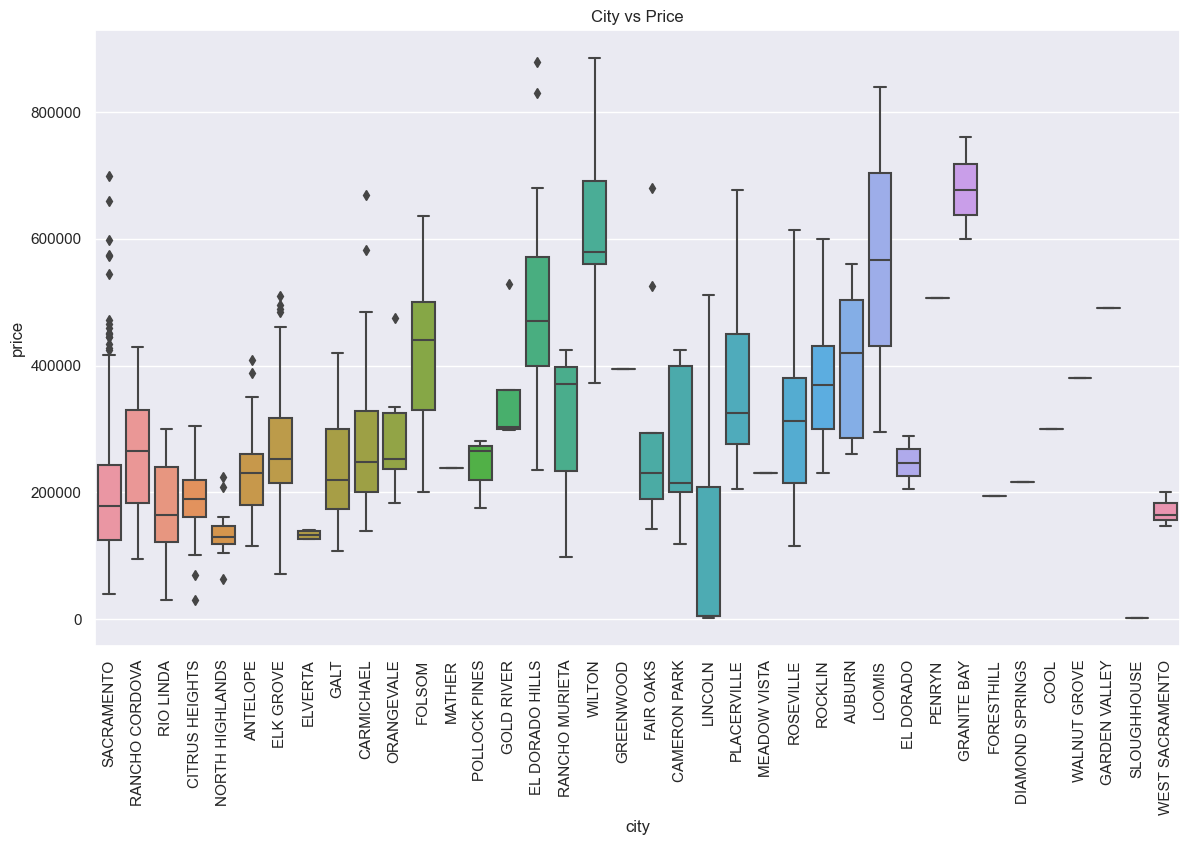

In [87]:
fig, axs = plt.subplots(figsize = (14,8))
sns.boxplot(x=df["city"], y=df["price"], ax = axs)
axs.set_xticklabels(axs.get_xticklabels(), rotation = 90)
plt.title("City vs Price")

This plot of city vs price shows the early trends of (within this data set) what cities have cheaper or more expensive properties. Some early obsrvations to note are,
- A large range of pricing in Sacramento, Loomis, Linclon, and El Dorado Hills (these were the most prevelant cities in the data, thus the wide range is expected).
- Relativley low house prices in Citrus Heights given that there are many data points with this city.
- The highest price in the set is from Wilton, while the lowest price is from Licoln.
- The highest cluster of prices is in Granite Bay.

The relationship between city and price has some important trends for ML modeling, but some downfalls. While, in the real world, price has quite the impact on property price, this data set is not evenly distributed between cities, thus these trends could lead to bias. This data could prove useful in a model if each city has the same number of properties, that is, extra properties in each city are dropped, or cities with low property listings are dropped, (or both).

#### Zip Code vs Price

C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

Text(0.5, 1.0, 'Zip Code vs Price')

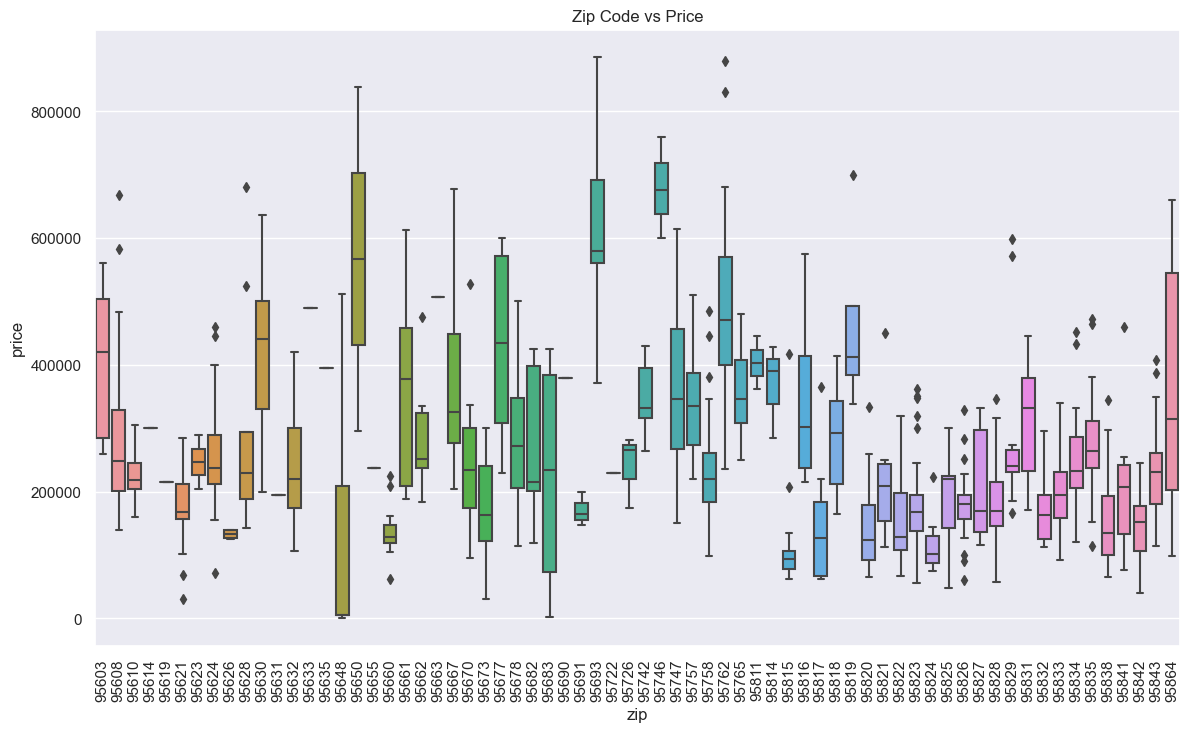

In [88]:
fig, axs = plt.subplots(figsize = (14,8))
sns.boxplot(x=df["zip"], y=df["price"], ax = axs)
axs.set_xticklabels(axs.get_xticklabels(), rotation = 90)
plt.title("Zip Code vs Price")

This boxplot of zipode to price is similar to the boxplox of city to price since zip codes are quite parallel to cities in terms of the location they represent. It is important to note that there are more unique zip codes than cities, thus this relationship may give more accurate results than city names in a ML model. Additionally,cthere are quite a few more outliers in this chart vs the city chart, so depending on the model used, this could result in degraded performance.

#### Beds vs Price

C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Beds vs Price')

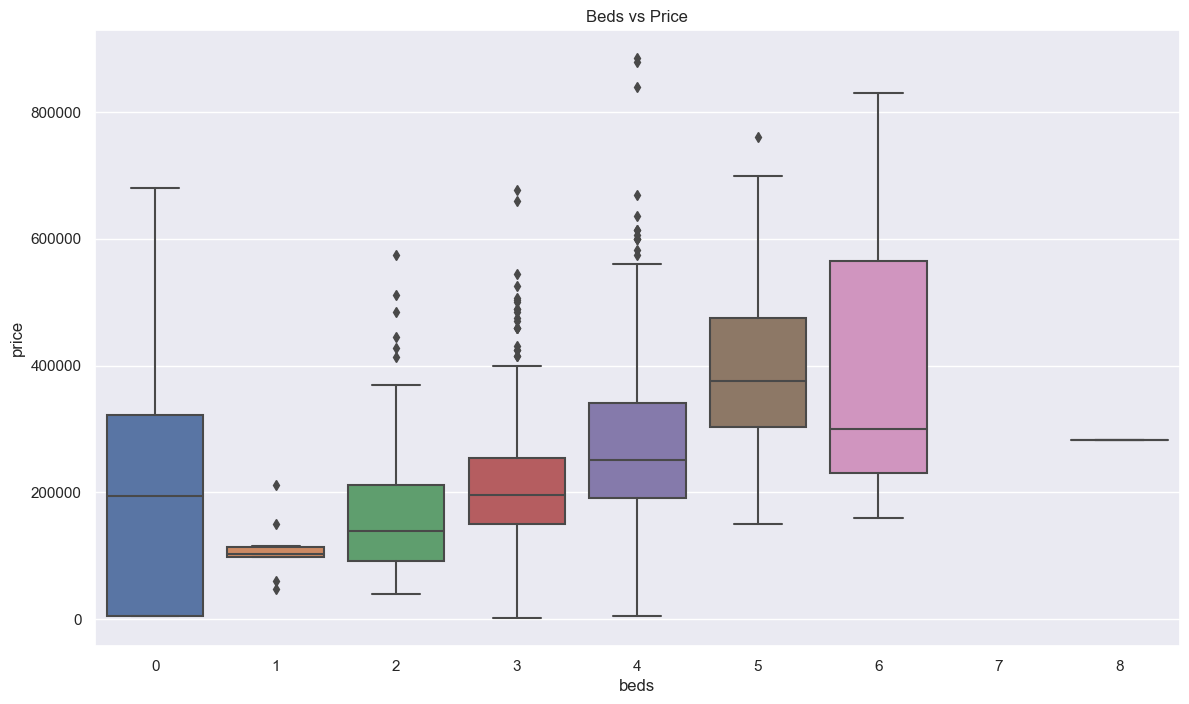

In [89]:
fig, axs = plt.subplots(figsize = (14,8))
#my_order = df.groupby(by=["beds"])["price"].median().iloc[::-1].index
sns.boxplot(x=df["beds"], y=df["price"], ax = axs, order = (0, 1, 2 ,3 , 4, 5, 6, 7, 8))
axs.set_xticklabels(axs.get_xticklabels())
plt.title("Beds vs Price")

The relationship between number of beds and price is very notable. 
- First, there is quite a large range and high median for properties with 0 rooms. As explained before, these are empty property lots. This data will need to be paired with the "empty_lot" variable to be useful for modeling, since it would make little sense in the context of the rest of this charts trends.
- There are no properties in this data set with 7 bed rooms.
- The highest price median is in properties with 5 bed rooms, even though there are properties with 6 or 8 bedrooms. However, the upper third quartile range is much larger in propertites with 6 bedrooms compared to the rest.
- The single property with 8 bedrooms has price similar to the median of properties with 6 bedrooms.
This data will not prove to be too useful with edge cases. That is, properties with 0, 6, 7, or 8 beds since there is a lack of data and/or unexpected behavior with these properties.


#### Baths vs Price

C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Baths vs Price')

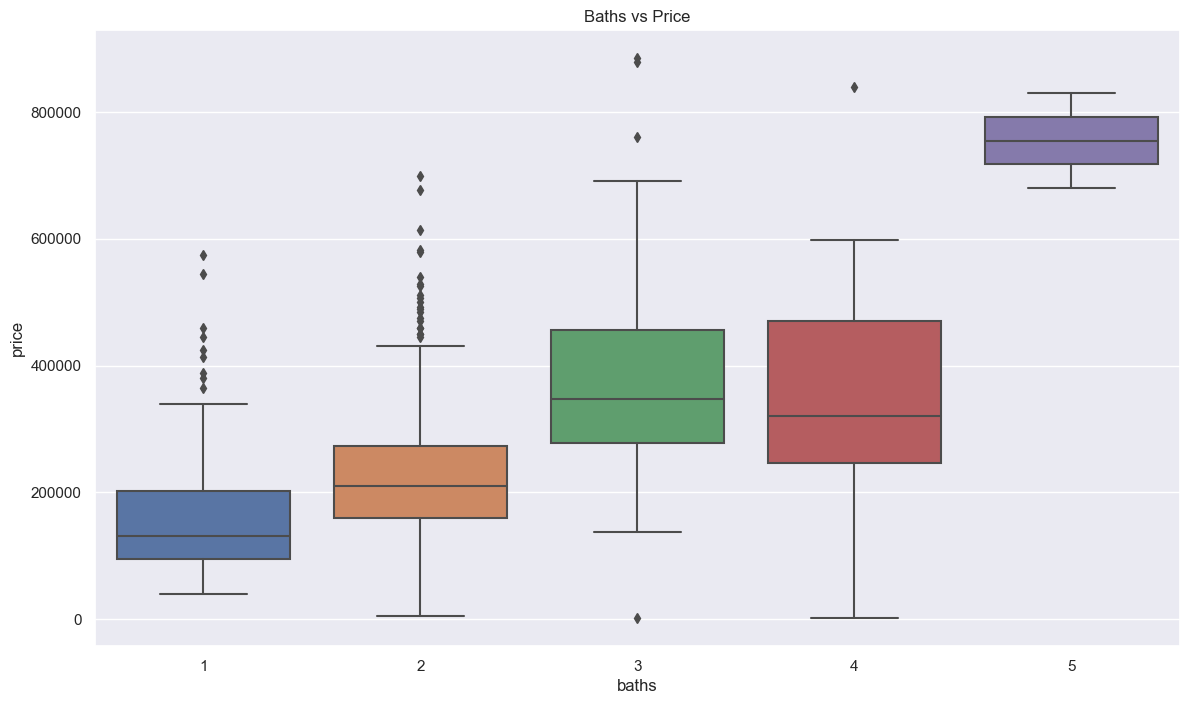

In [90]:
fig, axs = plt.subplots(figsize = (14,8))
#my_order = df.groupby(by=["beds"])["price"].median().iloc[::-1].index
sns.boxplot(x=df["baths"], y=df["price"], ax = axs, order = (1, 2 ,3 , 4, 5))
axs.set_xticklabels(axs.get_xticklabels())
plt.title("Baths vs Price")

Comapred to the beds vs price boxchart, the trends in the baths vs price box chart are much less suprising. The median price of the property increases with the number of bathrooms except for properties with 4 bathrooms.
- 4 bathroom properties not only have a lower median than those with 3 bathrooms, but also a lower high and low range.
- The median price of 5 bathroom properties is nearly twice that of 4 bathroom properties.
Bathroom vs price trends will be benifitial to modeling. The linear relationship of the inter quartiles is better representive of how bathroom to price ratios should be in the scope of property prices.

#### Street Type vs Price

C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

Text(0.5, 1.0, 'street_type vs Price')

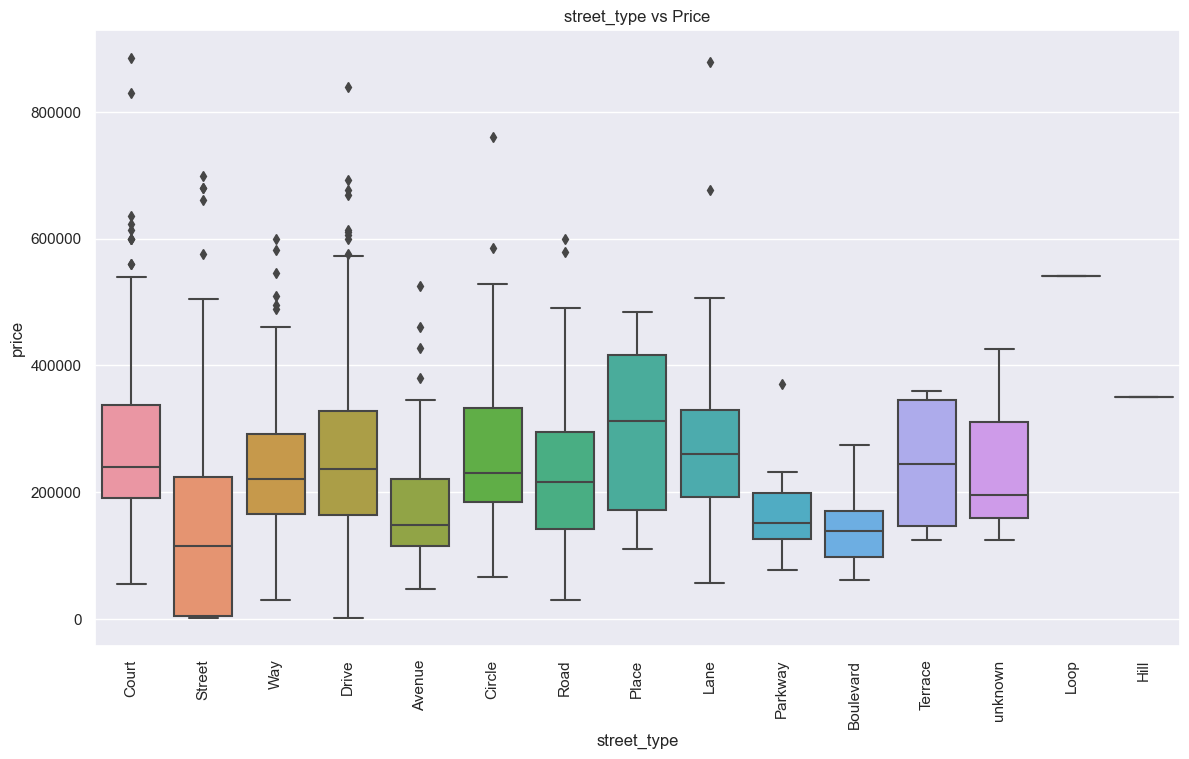

In [91]:
fig, axs = plt.subplots(figsize = (14,8))
my_order = df.groupby(by=["street_type"])["price"].median().iloc[::-1].index
sns.boxplot(x=df["street_type"], y=df["price"], ax = axs)
axs.set_xticklabels(axs.get_xticklabels(), rotation = 90)
plt.title("street_type vs Price")

Street types will be an elementary training variable. While it gives entry level information, the price ranges for each street type paired with the quantity bar graph of each street type (from last lab) show that there is a large range for each street type. The street types with lower ranges like parkway and boulevard were the least populated street types (had the least properties with that suffix), expalining the small ranges.

## Part 2: Classification on Property Type

### Continous Data and Property Type

#### Square Feet vs Property Type

C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

Text(0.5, 1.0, 'Square Feet vs Type')

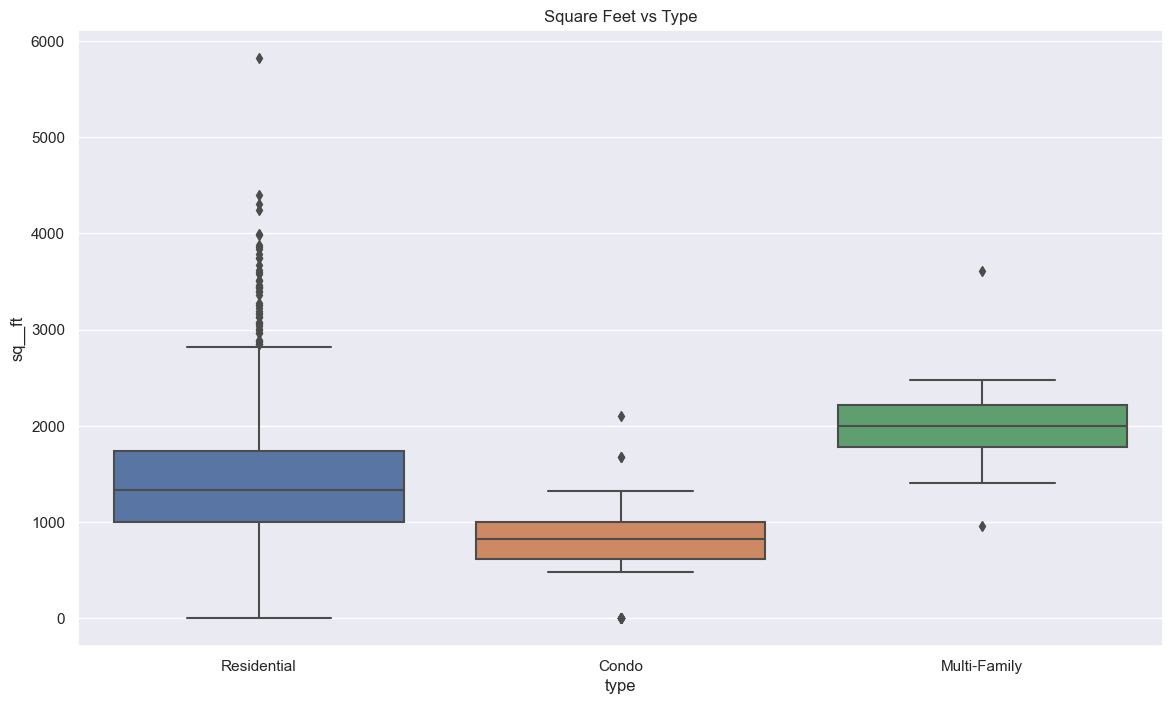

In [92]:
fig, axs = plt.subplots(figsize = (14,8))
sns.boxplot(x=df["type"], y=df["sq__ft"], ax = axs)
axs.set_xticklabels(axs.get_xticklabels())
plt.title("Square Feet vs Type")

The three property types fit the expected trend in regard to square feet. It is assumed that residential and multi-family properties are larger than condo properties, and multi-family homes are larger than single family residential homes. Since the middle quartile ranges of each property type have minimal overlap, this data will be helpful for predictive modeling when targeting property types.

#### Longitude and Latitude vs Property Type

C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

Text(0.5, 1.0, 'Latitude vs Type')

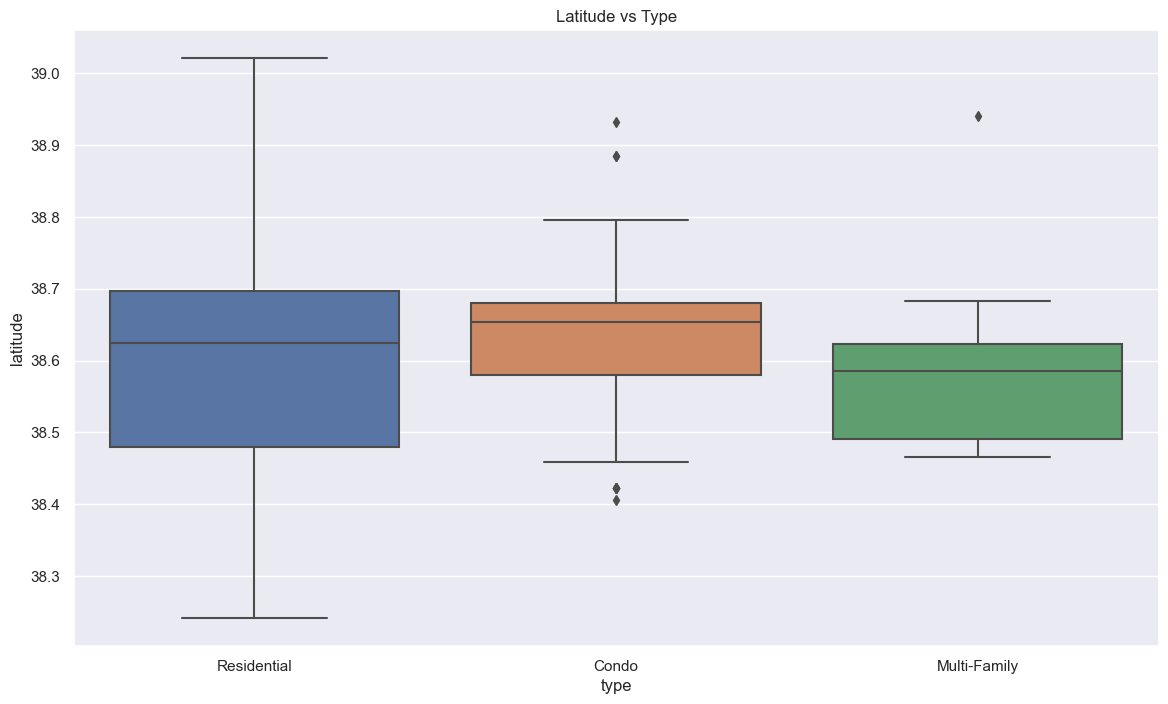

In [93]:
fig, axs = plt.subplots(figsize = (14,8))
sns.boxplot(x=df["type"], y=df["latitude"], ax = axs)
axs.set_xticklabels(axs.get_xticklabels())
plt.title("Latitude vs Type")

C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

Text(0.5, 1.0, 'longitude vs Type')

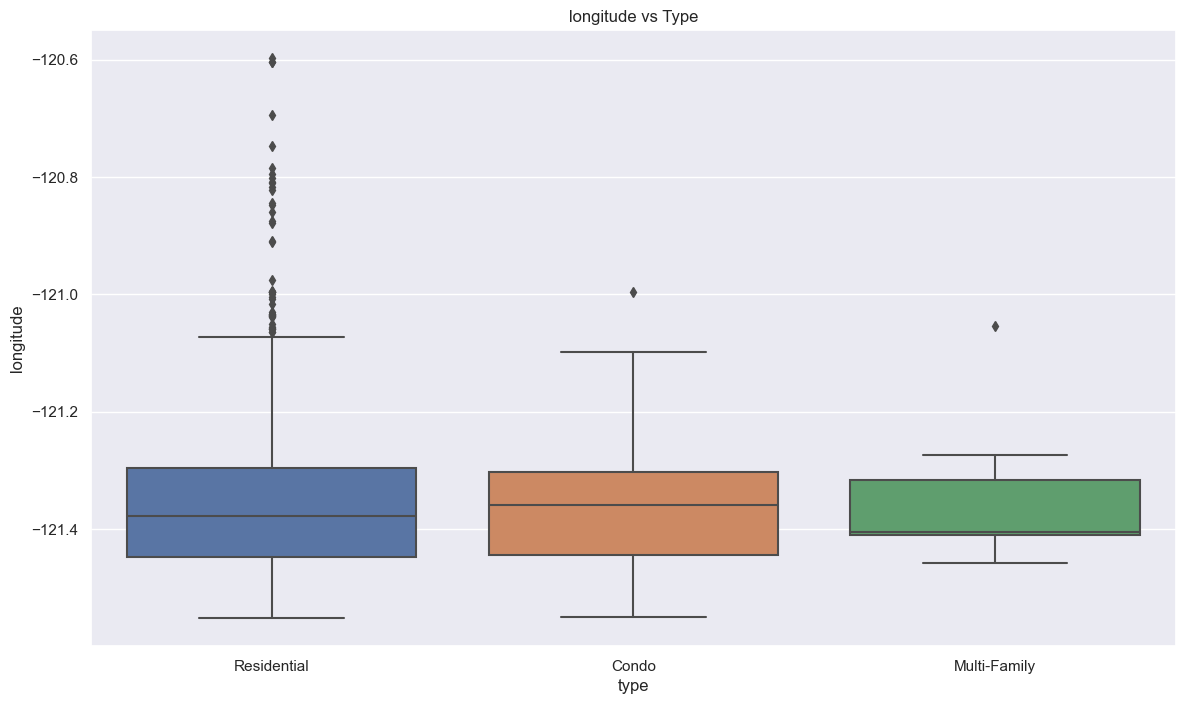

In [94]:
fig, axs = plt.subplots(figsize = (14,8))
sns.boxplot(x=df["type"], y=df["longitude"], ax = axs)
axs.set_xticklabels(axs.get_xticklabels())
plt.title("longitude vs Type")

Comparing property type to location in this medium does not explain much of their relationship. These trends will not be helpful for predictive modeling since they are so similar and unevenly weighted towards residential property data in addition to the inter quartiles completely overlapping one another. Refering back to the latitude and longitude vs price data, that chart almost gave us a "map" of sorts, where cheaper neighborhoods could be identified by clustering in the data. This data give no insites into where different property types cluster.

#### Price vs Property Type
While they are both dependent target variable, we can look at their relationship to further understand how some predictors may work for both price and type. (and just for fun)

C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bassoc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

Text(0.5, 1.0, 'Price vs Type')

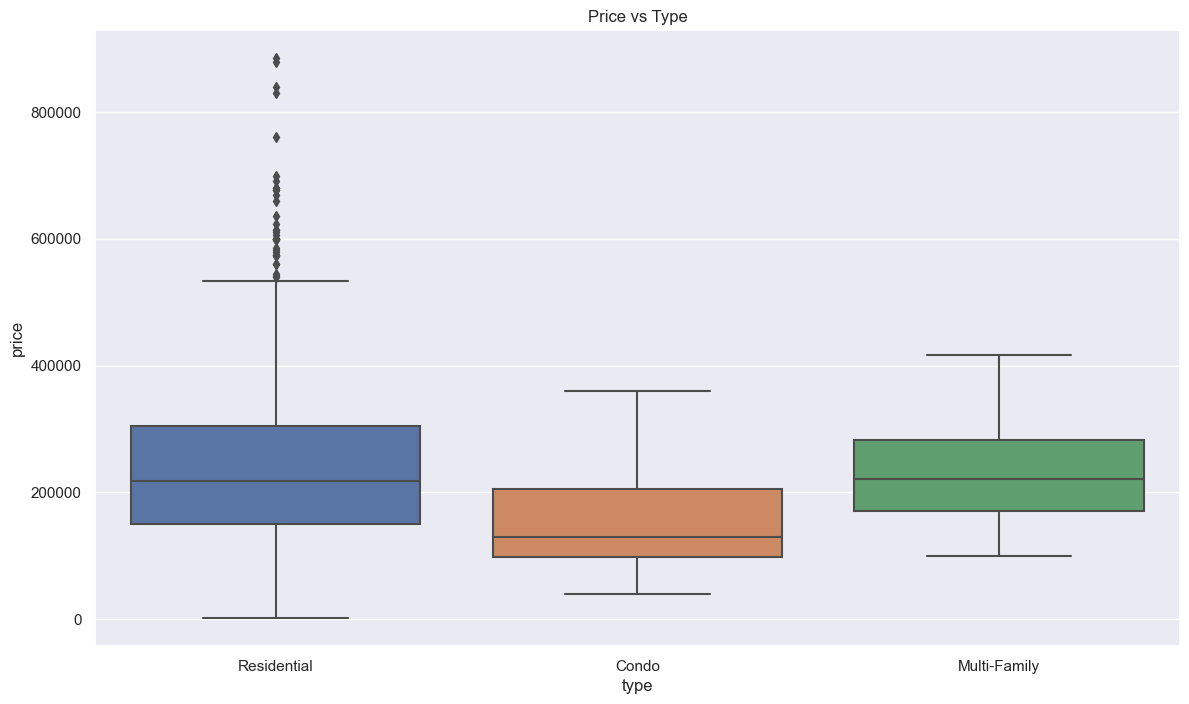

In [95]:
fig, axs = plt.subplots(figsize = (14,8))
sns.boxplot(x=df["type"], y=df["price"], ax = axs)
axs.set_xticklabels(axs.get_xticklabels())
plt.title("Price vs Type")

The trends shown in a price vs property type chart are quite similar to those in the square feet vs property type. This is because there is a strong linear relationship between price and square feet. This may show that square feet could be a predictor for both dependent variables. However, since price is also a dependent variable, this data can not be used for modeling.

### Categorical Data vs Property Type

#### City vs Property Type

In [96]:
ct = pd.crosstab(df["city"], df["type"])
ct.head(1000)

type,Condo,Multi-Family,Residential
city,,,
ANTELOPE,1,0,32
AUBURN,1,1,3
CAMERON PARK,1,0,8
CARMICHAEL,3,0,17
CITRUS HEIGHTS,2,1,32
COOL,0,0,1
DIAMOND SPRINGS,0,0,1
EL DORADO,0,0,2
EL DORADO HILLS,0,0,23


Each cross tabulation will be visulaized in a normalized stacked bar chart to anaylze the relationship between the categorical variable and propery type.

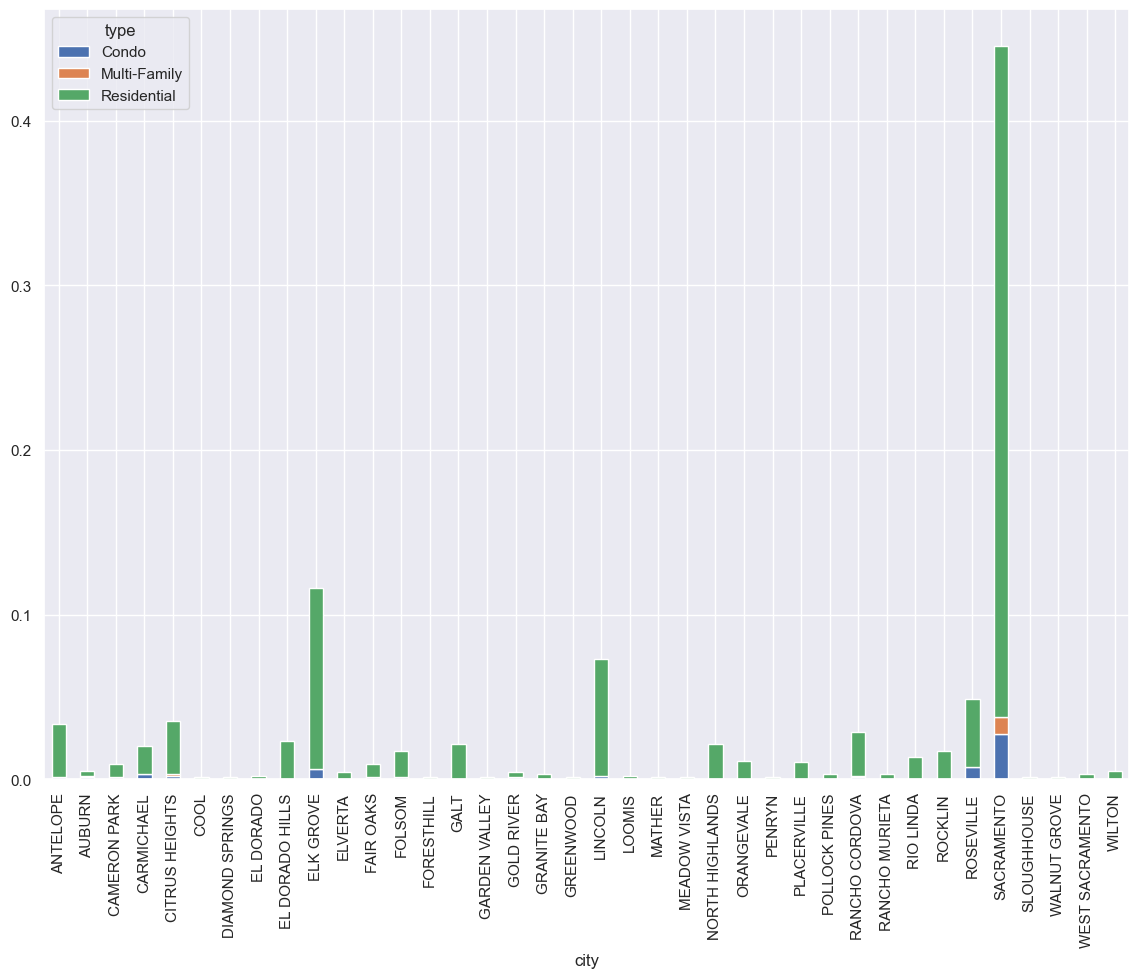

In [97]:
ct = pd.crosstab(df["city"], df["type"], normalize= True)
fig, axs = plt.subplots(figsize = (14,10))
sns.set(style='darkgrid')
plt.title("")
ct.plot(kind='bar', stacked=True, ax = axs)
plt.show()

While it may be hard to see, each property type (color) distributes differently over the different cities. Thus, the city variable is predictive of the property type.

#### Zipcode vs Property Type

In [98]:
ct = pd.crosstab(df["zip"], df["type"])
ct.head(1000)

type,Condo,Multi-Family,Residential
zip,,,
95603,1,1,3
95608,3,0,17
95610,0,1,6
95614,0,0,1
95619,0,0,1
...,...,...,...
95838,0,0,36
95841,3,0,4
95842,5,1,16


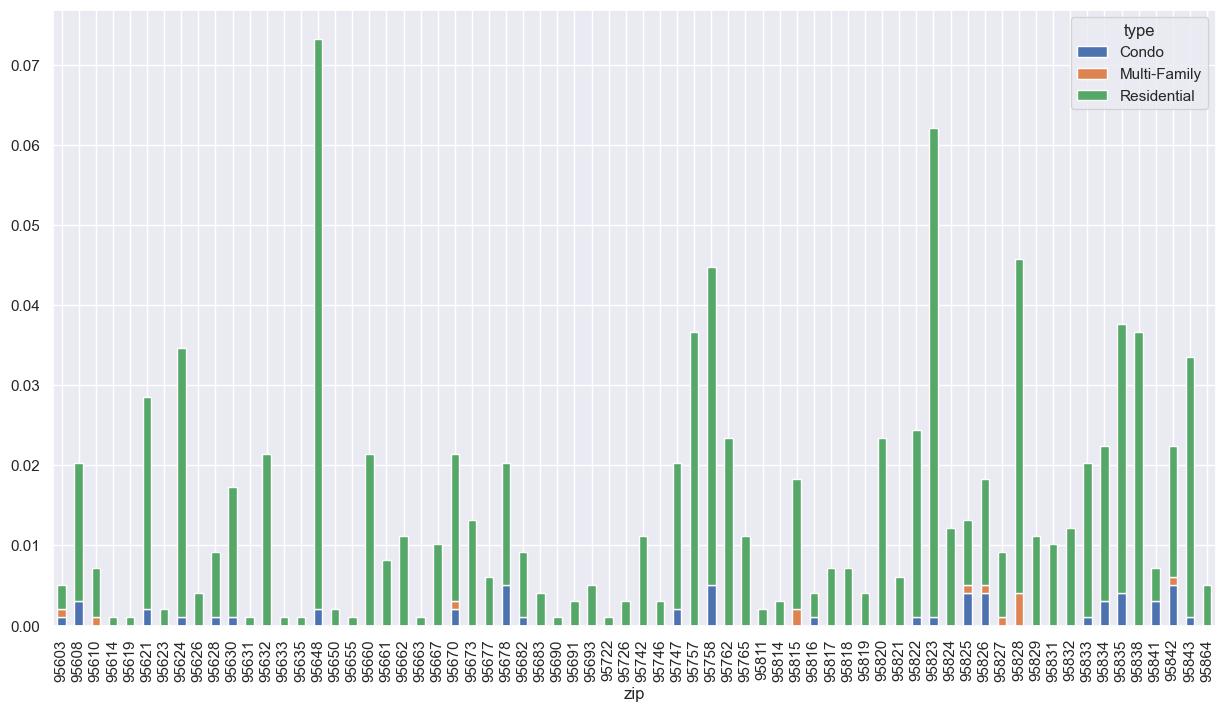

In [99]:
ct = pd.crosstab(df["zip"], df["type"], normalize= True)
fig, axs = plt.subplots(figsize = (15,8))
sns.set(style='darkgrid')
plt.title("")
ct.plot(kind='bar', stacked=True, ax = axs)
plt.show()

As previously stated, zip codes go quite hand in hand with city in, thus zip codes are predictive towards property type. However, since there are more zip codes than cities, there will be more accurate representations for location frequency of property types in a model.

#### Beds and Property Type

In [101]:
ct = pd.crosstab(df["beds"], df["type"])
ct.head(1000)

type,Condo,Multi-Family,Residential
beds,,,
0,8,0,99
1,9,0,1
2,30,1,101
3,7,0,406
4,0,8,250
5,0,2,57
6,0,1,2
8,0,1,0


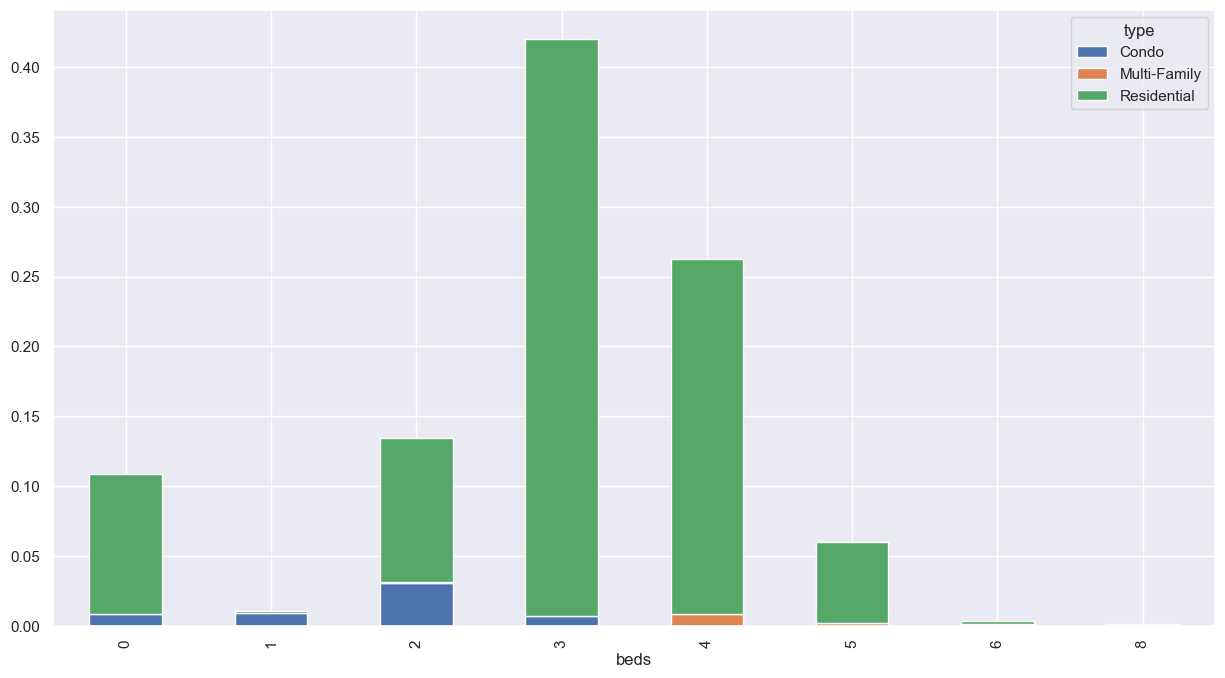

In [104]:
ct = pd.crosstab(df["beds"], df["type"], normalize= True)
fig, axs = plt.subplots(figsize = (15,8))
sns.set(style='darkgrid')
plt.title("")
ct.plot(kind='bar', stacked=True, ax = axs)
plt.show()

*Note that there are no properties with 7 beds*

Beds are predictive of property type since each property type is distributed over each number of beds differently. For example, there are no condo properties with 4 bedrooms while there are no mutli-family homes with 0, 1, 2, or 3 bedrooms.

#### Baths and Property Type

In [105]:
ct = pd.crosstab(df["baths"], df["type"])
ct.head(1000)

type,Condo,Multi-Family,Residential
baths,,,
0,8,0,99
1,25,0,154
2,21,6,517
3,0,0,132
4,0,7,12
5,0,0,2


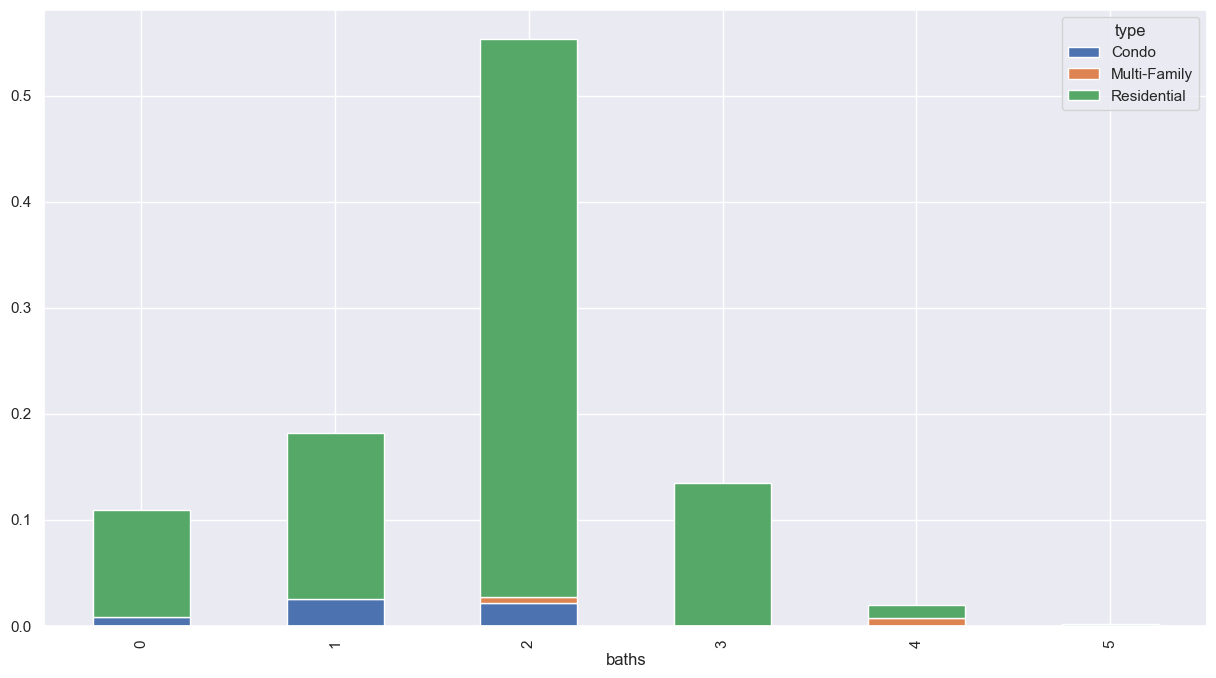

In [106]:
ct = pd.crosstab(df["baths"], df["type"], normalize= True)
fig, axs = plt.subplots(figsize = (15,8))
sns.set(style='darkgrid')
plt.title("")
ct.plot(kind='bar', stacked=True, ax = axs)
plt.show()

While the graphs may not look similar, the graphs show the same kind of distribution among property types over each number of bathrooms. However, number of bedrooms will be more predictive since it has a more "extreme" distribution. That is, ranges of each property type per column is wider.

#### Street Type and Property Type

In [108]:
ct = pd.crosstab(df["street_type"], df["type"])
ct.head(1000)

type,Condo,Multi-Family,Residential
street_type,,,
Avenue,1,1,79
Boulevard,4,1,8
Circle,1,2,62
Court,4,1,122
Drive,20,1,156
Hill,1,0,0
Lane,9,0,37
Loop,0,0,1
Parkway,3,0,4


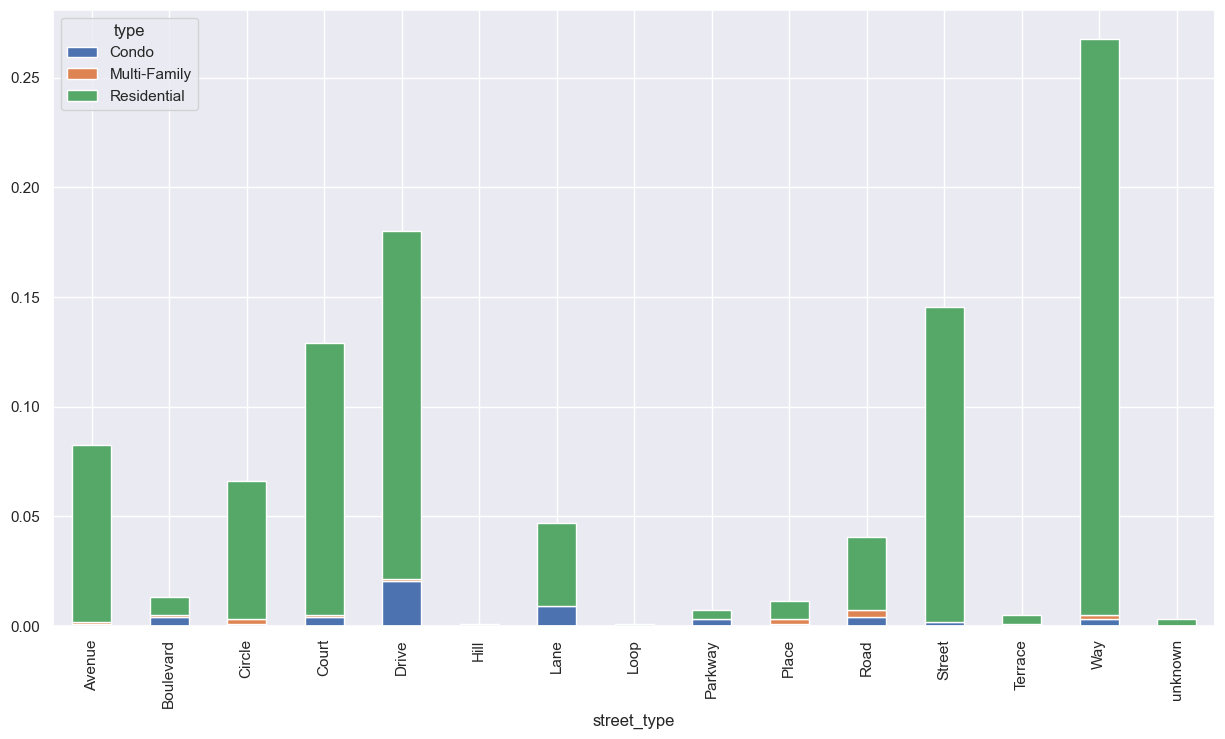

In [109]:
ct = pd.crosstab(df["street_type"], df["type"], normalize= True)
fig, axs = plt.subplots(figsize = (15,8))
sns.set(style='darkgrid')
plt.title("")
ct.plot(kind='bar', stacked=True, ax = axs)
plt.show()

Street types are nicely predictive towards property type. It is easier to see the various distributions over each suffix for each property.However, it can not be said that street type is more predictive than number of beds since the bed data has more categories with unique property types than the street type data. That is, the bed data chart has more bars with only one or two colors compared to all three.

## Part 3: Comparing Predictive Variables

The top predictive varibles for price are:
- Longitude and Latitude: Give the best and most accurate location data with price. (Runner up: zip code. It give a more general (less spesific) location prediction)
- Square feet: Has the most linear relationship for regressional modeling.
- Beds and Baths: Show similar linear relationships to eachother, could be most efficient if paired together.

The top predictive variables for property type are:
- Square Feet: Least quartile overlap.
- Zip Code: Most spesific location data with minimal quartile overlap.
- Beds: Best real world connections to property layout. (I.E. More families need more bedrooms)

Square feet and Beds are predictive for both property type. Both these variables follow real world expectations with minimal outliers, linear relationships to each dependent variable, and can be paired nicely with other predicitve variables like number of baths to further simulate a pseudo house in hopes of predicting each depenedent variable.

### Conclusion

This program aimed to visualize the cleaned California property data in hopes of identifying predictive variables for price or property type or both. From the various graphs, it can be said that logitude, latitude, square feet, beds, and baths are all predictive of price, and square feet, zip code, and beds are predictive of property type. If this program were to be continued in the future, more dependent variables could be looked at to indentify which variables have the strongest predictive relationship with others.